## Supervised Learning - Regression Mega Lab

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display
#http://python.6.x6.nabble.com/IPython-User-ipython-notebook-how-to-display-image-not-from-pylab-td4497427.html

# plotting modules
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
admissions = pd.read_csv('~/Desktop/USF_ECON628/ECON628-01/datasets/admissions/admissions.csv')               

In [3]:
admissions.head(3)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0


---

### Check for missing values

Print the number of rows on the data set

Print the total number of missing values



In [4]:
print admissions.shape[0]

400


In [5]:
print admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64


---

### Check for missing values

Using a list comprehension, identify the entries/rows with missing values, to do this you will need the index. 

Hint:

list_miss_val = [row for index, row in admissions.iterrows() .........

Then print the list_miss_val list

#### Helpful links for List Comprehensions

http://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

https://www.analyticsvidhya.com/blog/2016/01/python-tutorial-list-comprehension-examples/

http://stackoverflow.com/questions/15939811/pandas-list-comprehension-in-a-dataframe

In [6]:
list_miss_val = [row for index, row in admissions.iterrows() if row.isnull().sum() >0 ]
list_miss_val

###  I have left the for loop commands in here so you can see how a the list comprehension works
# empty_list =  []
# for index, row in admissions.iterrows():
#     if row.isnull().sum() > 0:
# #         print index, row
#         empty_list.append(row)
# print empty_list 

[admit       0.0
 gre         NaN
 gpa         NaN
 prestige    2.0
 Name: 187, dtype: float64, admit       0.00
 gre          NaN
 gpa         2.87
 prestige    2.00
 Name: 212, dtype: float64, admit         1.0
 gre         660.0
 gpa           NaN
 prestige      NaN
 Name: 236, dtype: float64]

---

### Check for missing values

Define a function that replaces the missing values with the mean of the column.
Hint: data = df.col_name


def missing_values(data):

    if data.isnull().sum() > ??:
    
       print "Number of missing values replaced with mean = ",  data.isnull().sum()
       
       code here
       
    elif data.isnull().sum() == ??:
    
        print "Number of missing values =  0"


In [7]:
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [8]:
def missing_values(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with mean = ",  data.isnull().sum()
        ''' here you can replace it with the mean'''
        data.fillna(np.mean(data), inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"

In [9]:
missing_values(admissions.gre)

Number of missing values replaced with mean =  2


In [10]:
missing_values(admissions.gpa)

Number of missing values replaced with mean =  2


In [11]:
missing_values(admissions.prestige)

Number of missing values replaced with mean =  1


In [12]:
missing_values(admissions.admit)

Number of missing values =  0


In [13]:
admissions.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [14]:
admissions.shape[0]

400

---

### Rapidly Visualize your data
Use one line of code

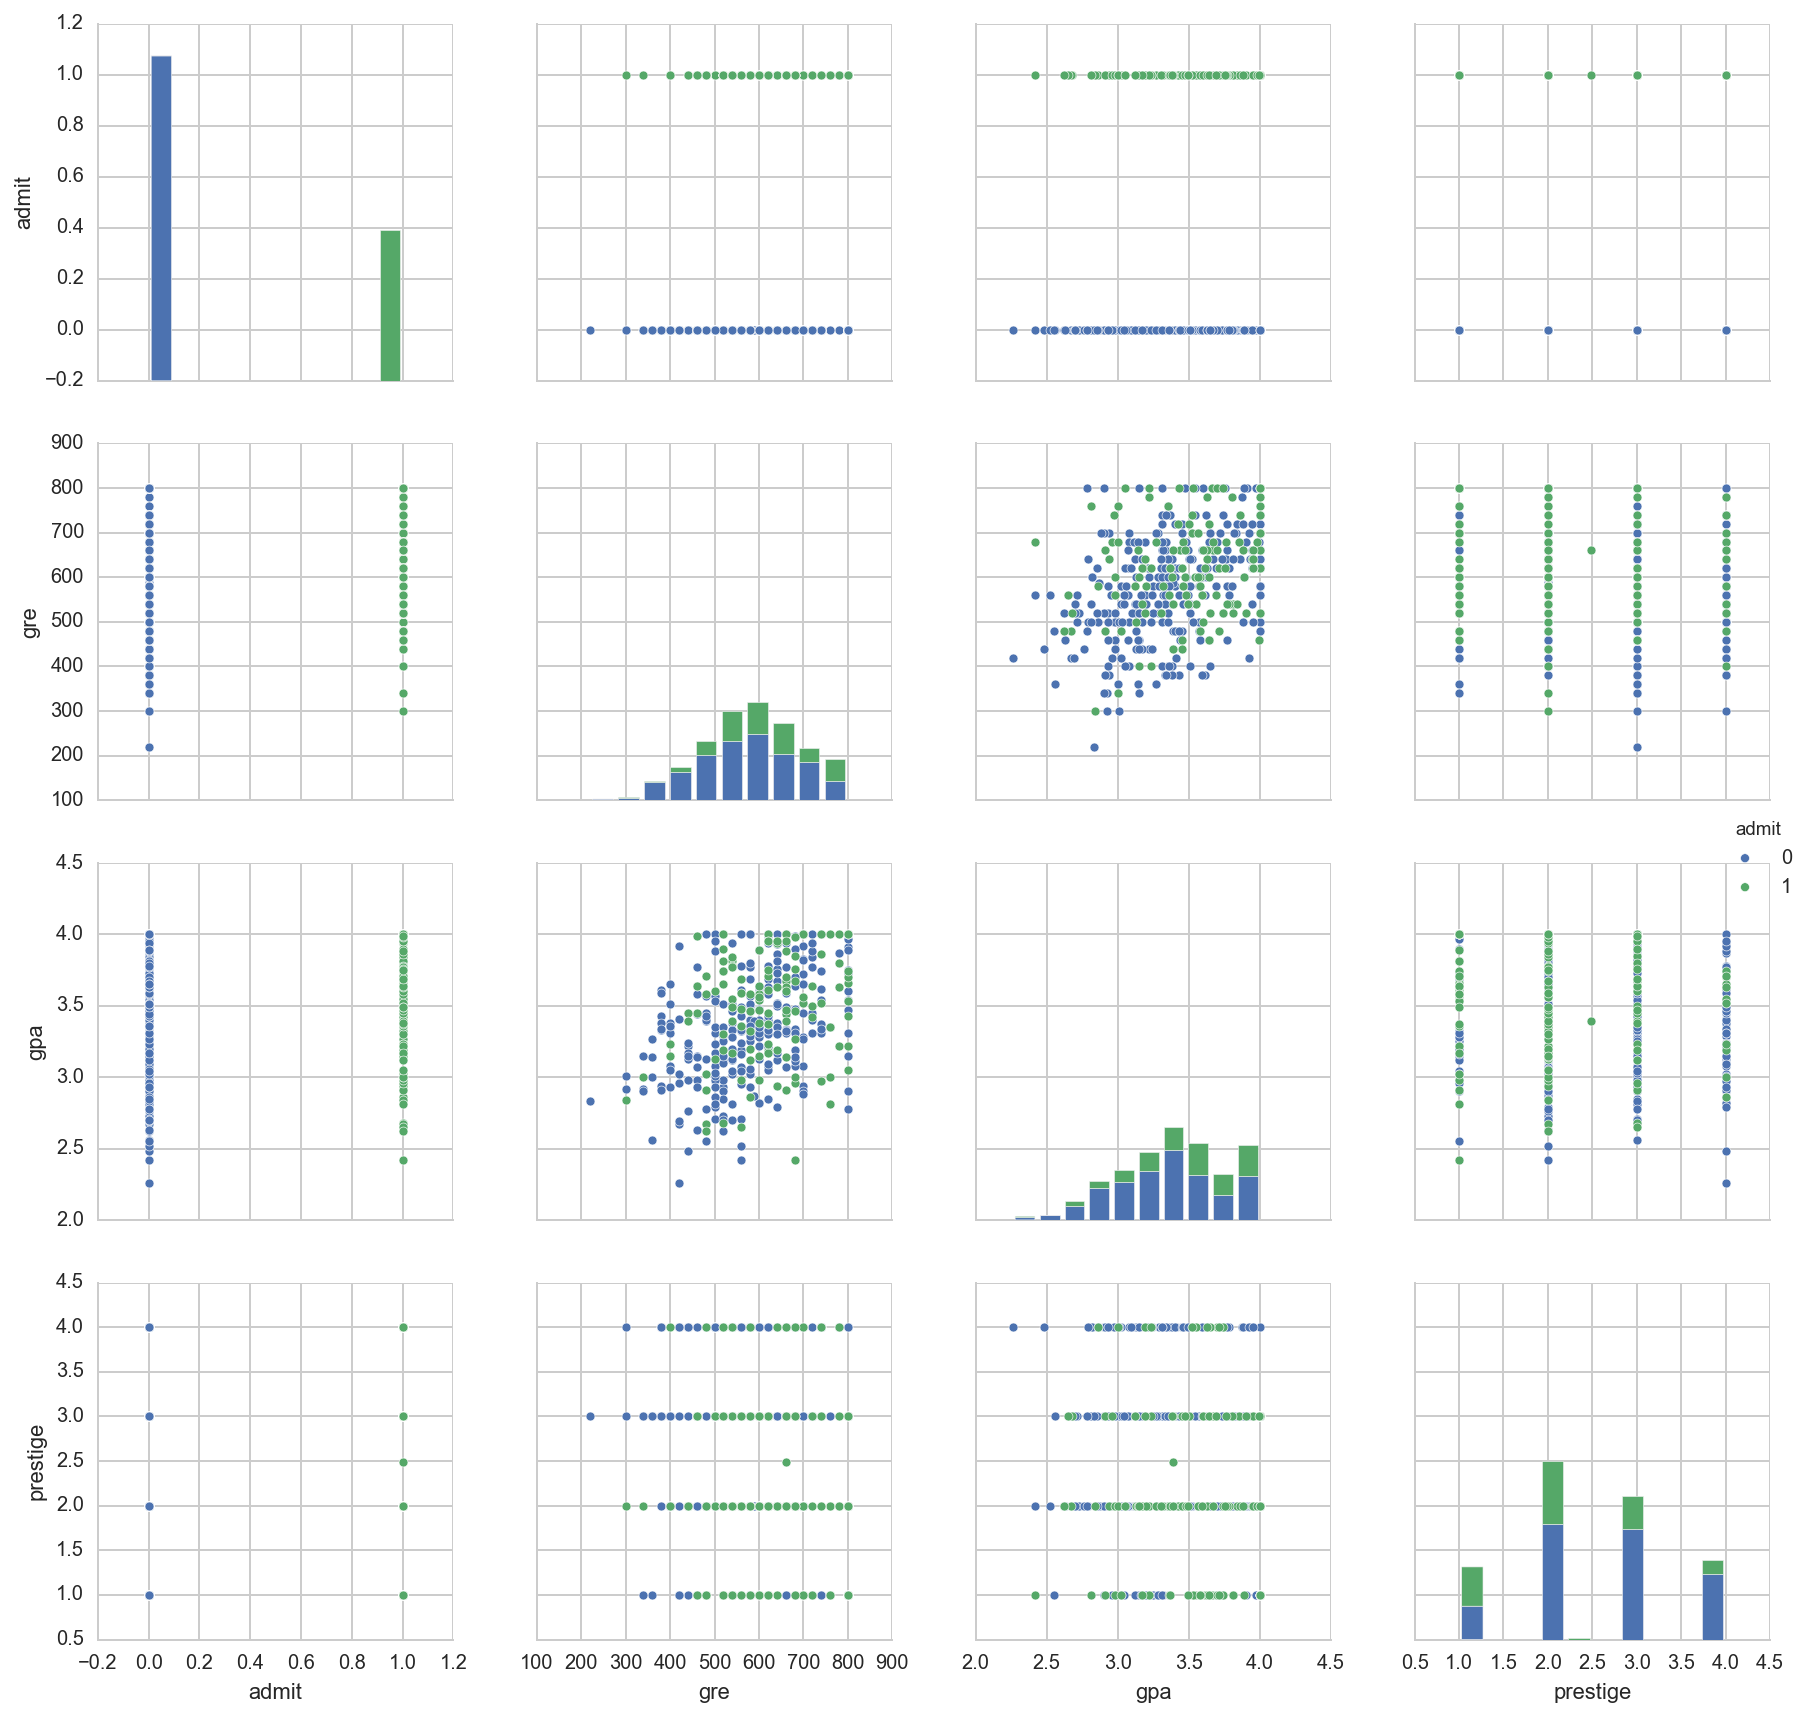

In [15]:
sns.pairplot(admissions, hue='admit', size=3)
plt.tight_layout()
plt.show()

---

### Create regression X, y data

The regression data will be:

    X = [admit, gre, prestige]
    y = gpa

In [16]:
X = admissions[['admit','gre','prestige']]
y = admissions.gpa.values

---

### Standarize your X
Remember that normalization is necessary for **regularization** but is **not** for decision trees 

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

---

### Split your data into Train and Test, and check the shapes of your subsets
test size = 30% and random_state = 10

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(280, 3) (120, 3)


(280,) (120,)


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


---

### Initiate a Linear Regression using Skelearn 


In [19]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

---

### Evaluate the performance of your OLS model on the train and on the test set


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [21]:
''' you can use the code below to evaluate your model or use the defined function or create your own'''
# print('MSE - OLS train: %.3f, test: %.3f' % (
#         mean_squared_error(ytrain, ytrain_pred),
#         mean_squared_error(ytest, ytest_pred)))
# print('R^2 0LS train: %.3f, test: %.3f' % (
#         r2_score(ytrain, ytrain_pred),
#         r2_score(ytest, ytest_pred)))

' you can use the code below to evaluate your model or use the defined function or create your own'

In [22]:
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [23]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.13, test data: 0.11
R^2 OLS train data: 0.17, test data: 0.13


---
## Now use regularized methods for regression
First implement a **Ridge regression** (the order doesn't really matter)

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [25]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

23.1012970008


In [26]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)

Ridge(alpha=23.101297000831593, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [27]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 0.13, test data: 0.11
R^2 Ridge train data: 0.16, test data: 0.13


**Now implement a Lasso Regression**

In [28]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0108843950116


..............................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [29]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)

Lasso(alpha=0.010884395011560986, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 0.13, test data: 0.11
R^2 Lasso train data: 0.16, test data: 0.14


**Now implement Elastic Net Regression**

In [31]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0111387829
1.0


In [32]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

ElasticNet(alpha=0.011138782900007992, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [33]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 0.13, test data: 0.11
R^2 Elastic Net train data: 0.16, test data: 0.14


---
## Which Regularization regressor perform the best?
## Print the coefficients


In [34]:
''' Here I am defining a function to print the coefficients, their absolute values and the non-absolute values'''
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)
    

In [35]:
best_reg_method(X, lasso)

,abs_coef,coef,variable
1,0.138273,0.138273,gre
0,0.032871,0.032871,admit
2,0.000000,-0.000000,prestige


---
## Now implement a Regression Tree
Include a gridsearch 

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [37]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [38]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 1}


best score 0.0707686720361


In [39]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [40]:
feature_importance(X, dtr_best)

,feature,importance
1,gre,0.806029
0,admit,0.126726
2,prestige,0.067245


In [41]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 3.13825397,  3.13825397,  3.50165857,  3.555     ,  3.24230769,
        3.24230769,  3.50165857,  3.50165857,  3.27142857,  3.27142857,
        3.13825397,  3.50165857,  3.50165857,  3.13825397,  3.555     ,
        3.13825397,  3.24230769,  3.50165857,  3.13825397,  3.50165857,
        3.13825397,  3.67741935,  3.50165857,  3.50165857,  3.13825397,
        3.50165857,  3.43965517,  3.43965517,  3.555     ,  3.67741935,
        3.50165857,  3.43965517,  3.43965517,  3.50165857,  3.50165857,
        3.555     ,  3.50165857,  3.24230769,  3.50165857,  3.50165857,
        3.13825397,  3.50165857,  3.67741935,  3.13825397,  3.13825397,
        3.50165857,  3.43965517,  3.50165857,  3.24230769,  3.555     ,
        3.13825397,  3.50165857,  3.50165857,  3.67741935,  3.555     ,
        3.555     ,  3.43965517,  3.67741935,  3.27142857,  3.43965517,
        3.24230769,  3.67741935,  3.67741935,  3.43965517,  3.13825397,
        3.24230769,  3.50165857,  3.24230769,  3.13825397,  3.13

In [42]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.12, test data: 0.12
R^2 Regression tree train data: 0.23, test data: 0.07


In [43]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

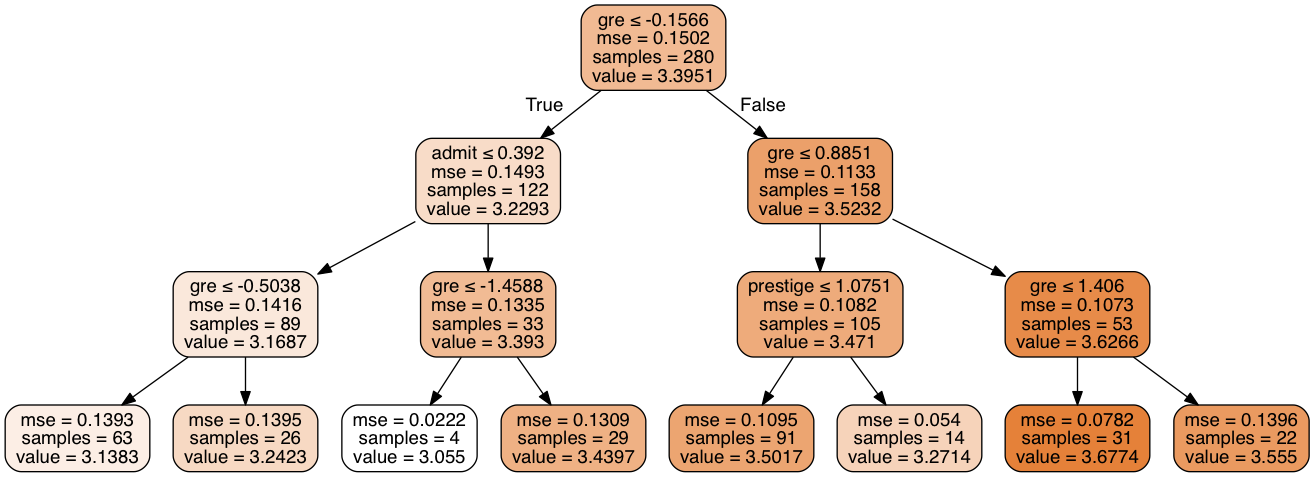

In [44]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

---
## Now implement a Random Forest Regression Tree
Include a gridsearch 

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [46]:
## Fit your random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [47]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=5, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 5, 'n_estimators': 100, 'max_depth': 5}


best score 0.117446262651


In [48]:
## Print the feauure importance
feature_importance(X, rfr_best)

,feature,importance
1,gre,0.821747
0,admit,0.106713
2,prestige,0.071540


In [49]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 3.10764156,  3.10979437,  3.43977674,  3.59193957,  3.24522696,
        3.25620468,  3.50203906,  3.45925831,  3.4698742 ,  3.48080844,
        3.1386492 ,  3.52131198,  3.54585798,  3.17146222,  3.57741362,
        3.19106098,  3.25663169,  3.45326044,  3.18630064,  3.51692863,
        3.1922157 ,  3.58467356,  3.5148944 ,  3.50490794,  3.19106098,
        3.50360674,  3.38142442,  3.41082824,  3.56334883,  3.58410956,
        3.51692863,  3.39499511,  3.40905837,  3.54585798,  3.51776329,
        3.56334883,  3.5148944 ,  3.26883521,  3.5148944 ,  3.50203906,
        3.15108397,  3.47036328,  3.58012401,  3.18677867,  3.18677867,
        3.50571218,  3.36565612,  3.46436541,  3.23259643,  3.61610021,
        3.17724117,  3.50203906,  3.50845663,  3.58410956,  3.56334883,
        3.59860993,  3.36703466,  3.62279615,  3.47997378,  3.38383157,
        3.24973379,  3.58012401,  3.60353882,  3.37819281,  3.13785326,
        3.25620468,  3.50122439,  3.27693704,  3.19543081,  3.17

In [50]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.12, test data: 0.11
R^2 Random Forest Regression tree train data: 0.22, test data: 0.11
